## Analysis on the confusion matrix

It can be telled clearly that beside the lack of training data, there exist some labels which can be confused by other labels, causing the limitation on the accuracy. To find out why, we may analyse them in this part.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

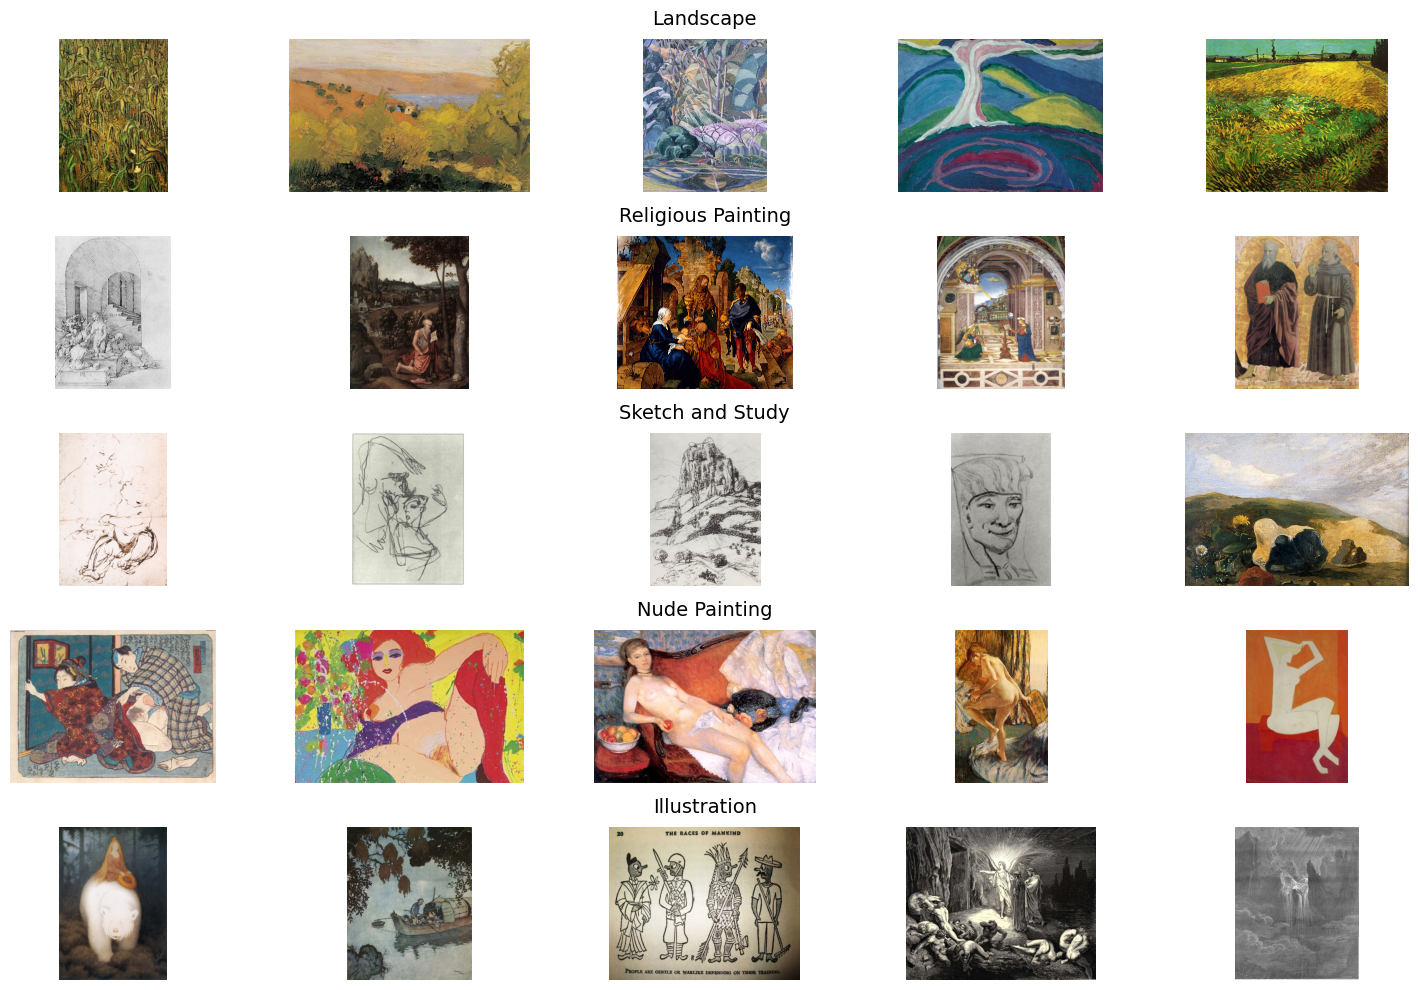

In [ ]:
genre = pd.read_csv("wikiart_csv/genre_train.csv")
genre.columns = ['path','label']

categories = {
    "Landscape": 4,
    "Religious Painting": 7,
    "Sketch and Study": 8,
    "Nude Painting": 5,
    "Illustration": 3
}

image_base_path = "wikiart/"

fig, axes = plt.subplots(len(categories), 5, figsize=(15, 10))

for row_idx, (category, label) in enumerate(categories.items()):
    images = genre[genre['label'] == label].head(5)
    axes[row_idx, 2].set_title(category, fontsize=14, pad=10)
    
    for col_idx, image_path in enumerate(images['path']):
        img = Image.open(image_base_path + image_path)
        axes[row_idx, col_idx].imshow(img)
        axes[row_idx, col_idx].axis('off')

    axes[row_idx, 0].set_ylabel(category, fontsize=12, rotation=90, labelpad=10)

plt.tight_layout()
plt.savefig('genre_sample.png')
plt.show()

It can be noticed that several of the often confused classifications (e.g., 3-5-8) show a large number of paintings dominated by figures, which in a way creates an obstacle for the computer's recognition. In addition, we can also find that the existing classifiers are less effective in learning LANDSCAPE as a LABEL. By observing the given training samples, it can be found that there is a great variability within the LANDSCAPE samples, and the classification criteria are rather rough. Modernist and abstract paintings have large differences in visual characteristics from classical paintings, which leads to difficulties in computer recognition.

In order to solve this problem, subsequent training of the adversarial generative model may be necessary.

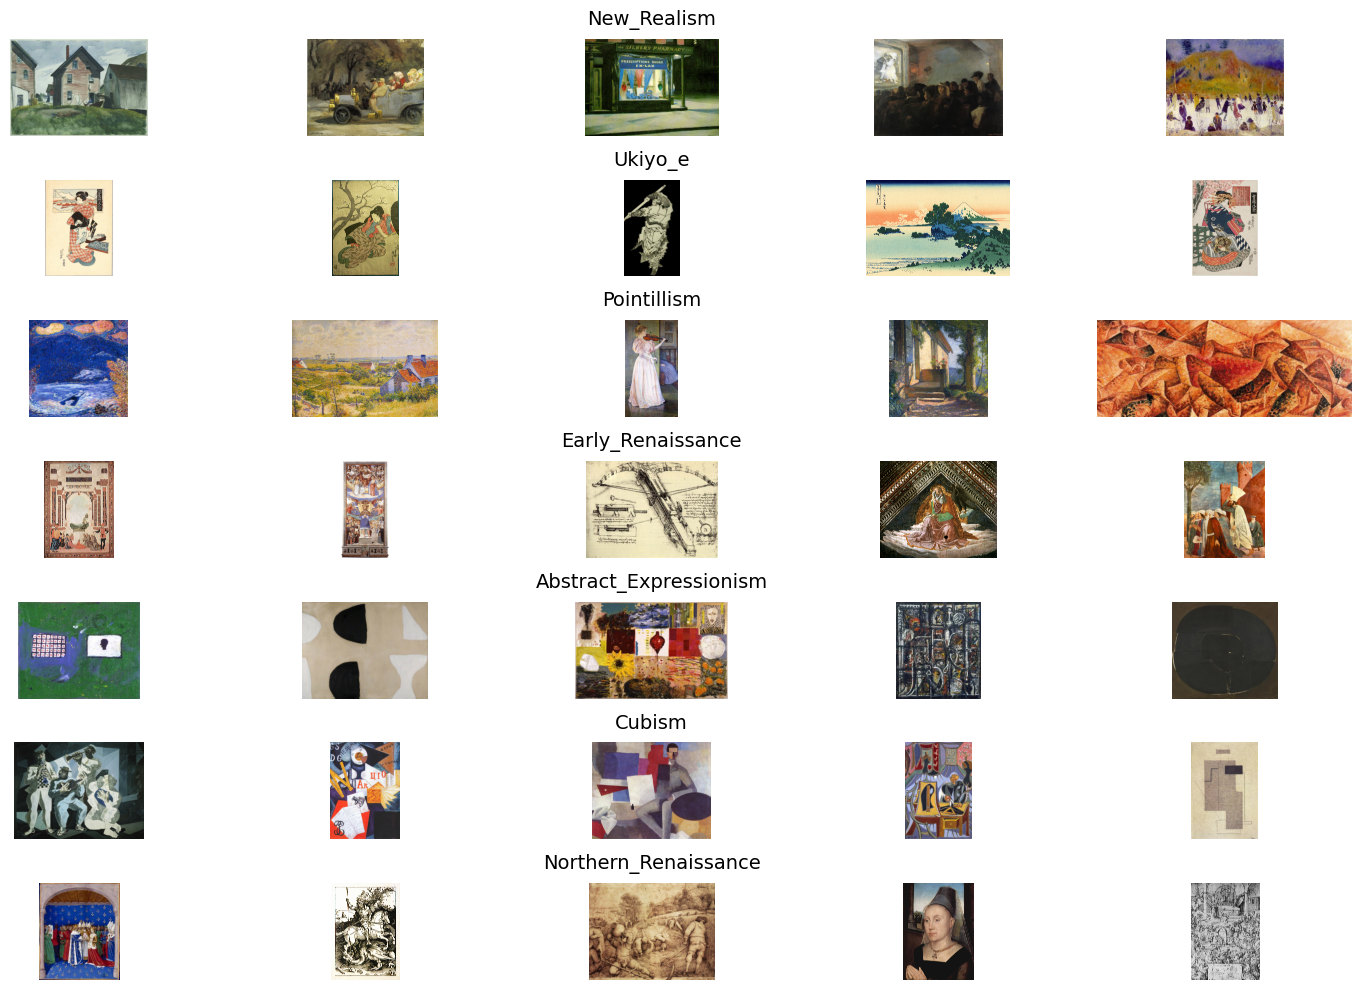

In [9]:
style = pd.read_csv("wikiart_csv/style_train.csv")
style.columns = ['path','label']

categories = {
    'New_Realism':16,
    'Ukiyo_e':26,
    'Pointillism':18,
    'Early_Renaissance':8,
    'Abstract_Expressionism':0,
    'Cubism':7,
    'Northern_Renaissance':17
}

image_base_path = "wikiart/"

fig, axes = plt.subplots(len(categories), 5, figsize=(15, 10))

for row_idx, (category, label) in enumerate(categories.items()):
    images = style[style['label'] == label].head(5)
    axes[row_idx, 2].set_title(category, fontsize=14, pad=10)
    
    for col_idx, image_path in enumerate(images['path']):
        img = Image.open(image_base_path + image_path)
        axes[row_idx, col_idx].imshow(img)
        axes[row_idx, col_idx].axis('off')

    axes[row_idx, 0].set_ylabel(category, fontsize=12, rotation=90, labelpad=10)

plt.tight_layout()
plt.savefig('style_sample.png')
plt.show()

It can be noticed that my model is good at distinguishing between figure paintings and non-figure paintings. Since both ukiyo-e and neorealism contain a lot of portraits, the computer tends to classify them into one category. It is worth noting, however, that this confusion is not meaningless. For example, the computer's confusion of Impressionism with ukiyo-e reflects the profound influence of ukiyo-e art on Impressionist art. (Yonemura, 1996) Neorealism was greatly influenced by the paintings of Impressionism, but there is a lack of exploration of the relationship between Neorealism and classical Japanese aesthetics in both the literary and artistic worlds. An examination of the philosophical ideas of neorealist painters such as Edward Hopper reveals that their emphasis on the isolation and loneliness of the individual in modern life is deeply compatible with traditional Japanese aesthetic thought. (Koob, 2004) This may provide ideas for future art studies.

## Reference
Yonemura, J. K. (1996). The Influence of Ukiyo-e on Impressionism and Post-impressionism. California State University, Dominguez Hills.

Koob, P. N. (2004). States of being: Edward Hopper and symbolist aesthetics. American Art, 18(3), 52-77.